In [1]:
import sys
sys.path.append('..')

In [2]:
import os
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from sklearn.metrics import mean_squared_error
from scipy import stats

In [4]:
from DomainPrediction.utils import helper
from DomainPrediction.utils.constants import *
from DomainPrediction.protein.base import BaseProtein

### Round 2

In [6]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/round_3_exp'

In [7]:
df_t_domain = pd.read_csv(os.path.join(data_path, 'dataset_2_tdomain.csv'))

In [8]:
df_t_domain['name'].to_numpy()

array(['WT', 'ESM1', 'ESM2', 'ESM3', 'ESM4', 'IN1', 'IN2', 'IN3', 'IN4',
       'IN5', 'IN6', 'IN7', 'esm3_gen_17', 'esm3_str_gen_53',
       'esm3_str_gen_170', 'esm3_gen_192', 'esm3_gen_333',
       'esm3_str_gen_365', 'esm3_gen_385', 'evodiff_gen_77',
       'II_guidance-ESM3', 'Test-IN1-improved', 'Test-IN4-improved',
       'Test-IN7-improved', 'evodiff_gen_21', 'evodiff_gen_88',
       'evodiff_gen_155', 'evodiff_gen_357', 'esm3_gen_93',
       'esm3_str_gen_314', 'esm3_str_gen_323', 'II guidance-WT',
       'II guidance-ESM2', 'II guidance-IN2', 'prob_guidancd-ESM2',
       'Test-IN2-improved', 'Test-IN5-improved', 'GxpS_DESIGN-1',
       'GxpS_DESIGN-3', 'GxpS_DESIGN-4', 'GxpS_DESIGN-5', 'GxpS_DESIGN-6',
       'GxpS_DESIGN-7', 'GxpS_DESIGN-8', 'GxpS_DESIGN-9',
       'GxpS_DESIGN-11', 'GxpS_DESIGN-14', 'GxpS_DESIGN-16',
       'GxpS_DESIGN-17', 'GxpS_DESIGN-18', 'GxpS_DESIGN-19',
       'GxpS_DESIGN-20', 'GxpS_DESIGN-21', 'GxpS_DESIGN-22',
       'GxpS_DESIGN-23', 'GxpS_DESIGN

In [9]:
some_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/al_test_experiments/Tdomain'
filenames = {'results_2_tdomain_confit.csv': ['name', 'pred_ESMC600M_confit'], 
             'results_2_tdomain_embed.csv': ['name', 'pred_ESMC600M_concat_ridge'], 
             'results_2_tdomain_zeroshot.csv': ['name', 'pred_ESMC600_wt_marginal', 'pred_ESMC600_masked_marginal']
            }
for _file in filenames:
    df = pd.read_csv(os.path.join(some_path, _file))[filenames[_file]]
    df_t_domain = df_t_domain.merge(df, on='name', how='left')

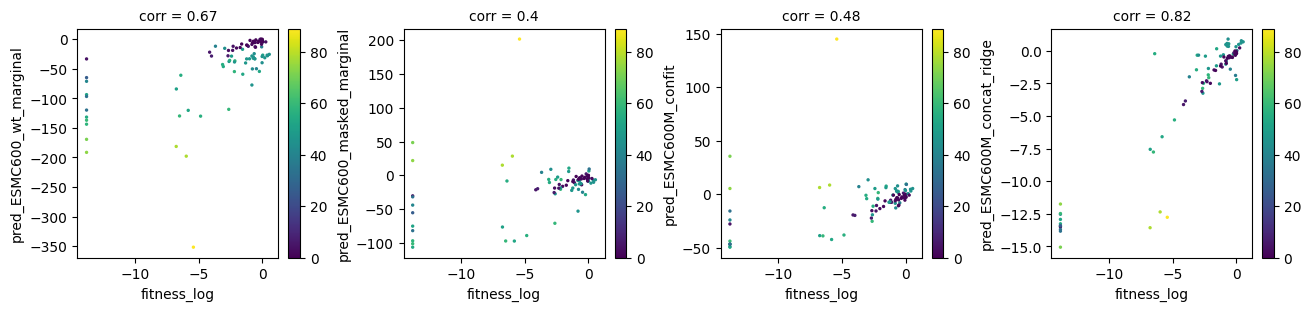

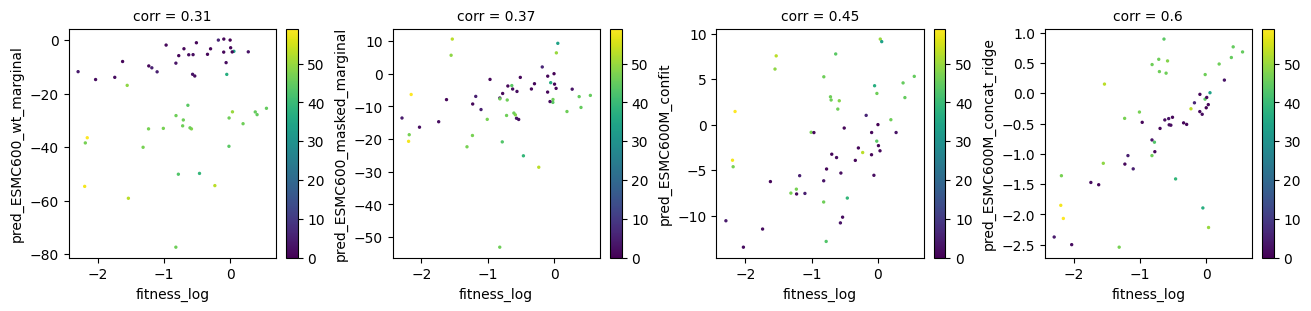

In [10]:
predictors = ['pred_ESMC600_wt_marginal', 'pred_ESMC600_masked_marginal', 'pred_ESMC600M_confit', 'pred_ESMC600M_concat_ridge']
x_anchor = 'fitness_log'

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_t_domain[x_anchor], df_t_domain[predictors[i]], s=2, c=df_t_domain['n_mut'])
    corr = stats.spearmanr(df_t_domain[x_anchor], df_t_domain[predictors[i]]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
mask = df_t_domain['fitness_raw'] > 0.1
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_t_domain[x_anchor][mask], df_t_domain[predictors[i]][mask], s=2, c=df_t_domain['n_mut'][mask])
    corr = stats.spearmanr(df_t_domain[x_anchor][mask], df_t_domain[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)

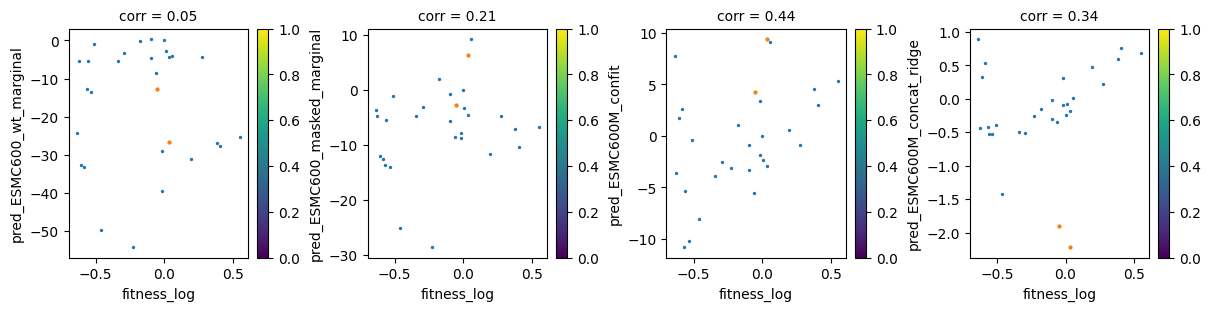

In [11]:
predictors = ['pred_ESMC600_wt_marginal', 'pred_ESMC600_masked_marginal', 'pred_ESMC600M_confit', 'pred_ESMC600M_concat_ridge']
x_anchor = 'fitness_log'

fig, ax = plt.subplots(1, 4, figsize=(12, 3), layout='constrained')
mask = df_t_domain['fitness_raw'].between(0.5,5)
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_t_domain[x_anchor][mask], df_t_domain[predictors[i]][mask], s=2, label='rest')

    _mask = mask & df_t_domain['name'].str.contains('evodiff')
    im = ax_.scatter(df_t_domain[x_anchor][_mask], df_t_domain[predictors[i]][_mask], s=4, label='evodiff')
    _mask = mask & df_t_domain['name'].str.contains('esm3_str')
    im = ax_.scatter(df_t_domain[x_anchor][_mask], df_t_domain[predictors[i]][_mask], s=4, label='esm3_str')
    
    corr = stats.spearmanr(df_t_domain[x_anchor][mask], df_t_domain[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    # ax_.legend()
    fig.colorbar(im, ax=ax_)

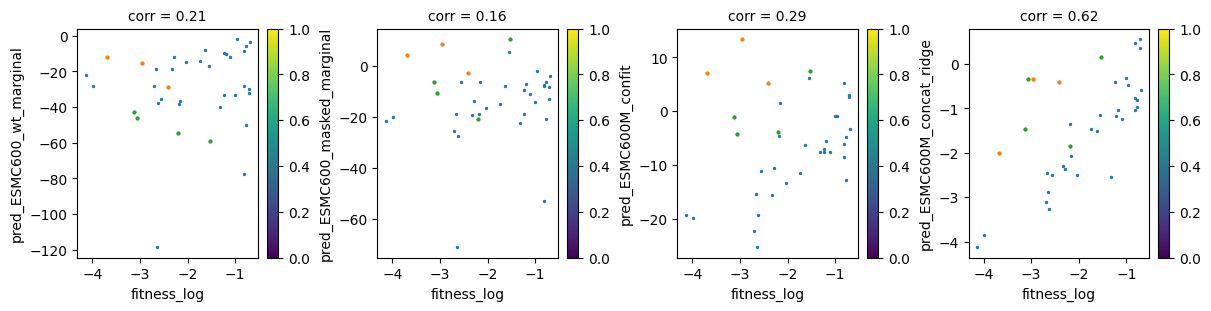

In [12]:
predictors = ['pred_ESMC600_wt_marginal', 'pred_ESMC600_masked_marginal', 'pred_ESMC600M_confit', 'pred_ESMC600M_concat_ridge']
x_anchor = 'fitness_log'

fig, ax = plt.subplots(1, 4, figsize=(12, 3), layout='constrained')
mask = df_t_domain['fitness_raw'].between(0.01,0.5)
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_t_domain[x_anchor][mask], df_t_domain[predictors[i]][mask], s=2, label='rest')

    _mask = mask & df_t_domain['name'].str.contains('evodiff')
    im = ax_.scatter(df_t_domain[x_anchor][_mask], df_t_domain[predictors[i]][_mask], s=4, label='evodiff')
    _mask = mask & df_t_domain['name'].str.contains('esm3_str')
    im = ax_.scatter(df_t_domain[x_anchor][_mask], df_t_domain[predictors[i]][_mask], s=4, label='esm3_str')
    
    corr = stats.spearmanr(df_t_domain[x_anchor][mask], df_t_domain[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    # ax_.legend()
    fig.colorbar(im, ax=ax_)

### Load gen predictions

In [13]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/round_3_exp'

In [14]:
df_gen = pd.read_csv(os.path.join(data_path, 'gen_pred.csv'))

In [15]:
df_gen.head()

,name,sequence,masked_sequence,n_mut,esmc_wt_marginal,esmc_masked_marginal,esmc_pll,esmc_full_wt_marginal,esmc_full_masked_marginal,mut_bin,pred_confit_1,pred_confit_2,pred_confit_3,pred_concat_1,pred_concat_2,pred_concat_3
0,gxps_ATC_esm3_str_gen_0,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APSAADYPKEPYVAPEGEAEQLLAQIWMELLGVERVGRHDNFFALG...,49,-44.019165,-16.101318,-152.53116,-58.318970,-41.270752,40-50,-8.140015,-13.653564,-10.770996,-2.623462,-2.603725,-2.519686
1,gxps_ATC_esm3_str_gen_1,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APSDTDYPRTPYIAPEGAVEETLAAIWQDLLQVERVGRHDSFFALG...,47,-41.208496,-12.600098,-149.14124,-52.558716,-31.674561,40-50,-1.620117,-8.660645,-2.838379,-1.587067,-2.153117,-2.646813
2,gxps_ATC_esm3_str_gen_2,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,EPQASDYPAVPYEAPEGEQEQLLAGIWQELLGVERVGRHDNFFALG...,46,-46.686646,-22.641846,-157.42130,-57.561768,-43.364258,40-50,-10.613037,-12.717773,-12.023682,-3.302396,-2.468691,-3.325304
3,gxps_ATC_esm3_str_gen_3,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APAEDSFDRAPYVAPEGEVEQTLAGIWQELLQVERVGRHDSFFELG...,49,-31.578125,-2.216797,-155.64465,-40.660645,-28.473633,40-50,-6.089111,-11.967773,-10.611816,-2.219298,-2.760280,-3.676155
4,gxps_ATC_esm3_str_gen_4,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APSEDDYPKPPYVAPEGEVEQLLAKIWQELLGVEKVGRHDSFFALG...,43,-44.613281,-16.470703,-156.66013,-50.236816,-36.729492,40-50,-6.050781,-11.535156,-5.494141,-3.334414,-3.854989,-3.998108


In [16]:
gxps_protein = BaseProtein(file='/nethome/kgeorge/workspace/DomainPrediction/Data/gxps/gxps_ATC_AF.pdb')
gxps_T_domain = ''.join([gxps_protein.sequence[i] for i in range(len(gxps_protein.sequence)) if i not in A_gxps_atc+C_gxps_atc])
gxps_base_seq = gxps_protein.sequence

assert len(gxps_T_domain) == 115

In [17]:
df_gen['pred_confit_mean'] = df_gen[['pred_confit_1', 'pred_confit_2', 'pred_confit_3']].mean(axis=1)
df_gen['pred_confit_std'] = df_gen[['pred_confit_1', 'pred_confit_2', 'pred_confit_3']].std(axis=1)

df_gen['pred_concat_mean'] = df_gen[['pred_concat_1', 'pred_concat_2', 'pred_concat_3']].mean(axis=1)
df_gen['pred_concat_std'] = df_gen[['pred_concat_1', 'pred_concat_2', 'pred_concat_3']].std(axis=1)

In [18]:
df_gen.head()

,name,sequence,masked_sequence,n_mut,esmc_wt_marginal,esmc_masked_marginal,esmc_pll,esmc_full_wt_marginal,esmc_full_masked_marginal,mut_bin,pred_confit_1,pred_confit_2,pred_confit_3,pred_concat_1,pred_concat_2,pred_concat_3,pred_confit_mean,pred_confit_std,pred_concat_mean,pred_concat_std
0,gxps_ATC_esm3_str_gen_0,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APSAADYPKEPYVAPEGEAEQLLAQIWMELLGVERVGRHDNFFALG...,49,-44.019165,-16.101318,-152.53116,-58.318970,-41.270752,40-50,-8.140015,-13.653564,-10.770996,-2.623462,-2.603725,-2.519686,-10.854858,2.757731,-2.582291,0.055108
1,gxps_ATC_esm3_str_gen_1,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APSDTDYPRTPYIAPEGAVEETLAAIWQDLLQVERVGRHDSFFALG...,47,-41.208496,-12.600098,-149.14124,-52.558716,-31.674561,40-50,-1.620117,-8.660645,-2.838379,-1.587067,-2.153117,-2.646813,-4.373047,3.762800,-2.128999,0.530285
2,gxps_ATC_esm3_str_gen_2,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,EPQASDYPAVPYEAPEGEQEQLLAGIWQELLGVERVGRHDNFFALG...,46,-46.686646,-22.641846,-157.42130,-57.561768,-43.364258,40-50,-10.613037,-12.717773,-12.023682,-3.302396,-2.468691,-3.325304,-11.784831,1.072505,-3.032130,0.488087
3,gxps_ATC_esm3_str_gen_3,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APAEDSFDRAPYVAPEGEVEQTLAGIWQELLQVERVGRHDSFFELG...,49,-31.578125,-2.216797,-155.64465,-40.660645,-28.473633,40-50,-6.089111,-11.967773,-10.611816,-2.219298,-2.760280,-3.676155,-9.556234,3.078207,-2.885245,0.736424
4,gxps_ATC_esm3_str_gen_4,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APSEDDYPKPPYVAPEGEVEQLLAKIWQELLGVEKVGRHDSFFALG...,43,-44.613281,-16.470703,-156.66013,-50.236816,-36.729492,40-50,-6.050781,-11.535156,-5.494141,-3.334414,-3.854989,-3.998108,-7.693359,3.338715,-3.729170,0.349278


### base plots

no of esm3 sequences: 4960
no of evodiff sequences: 3933


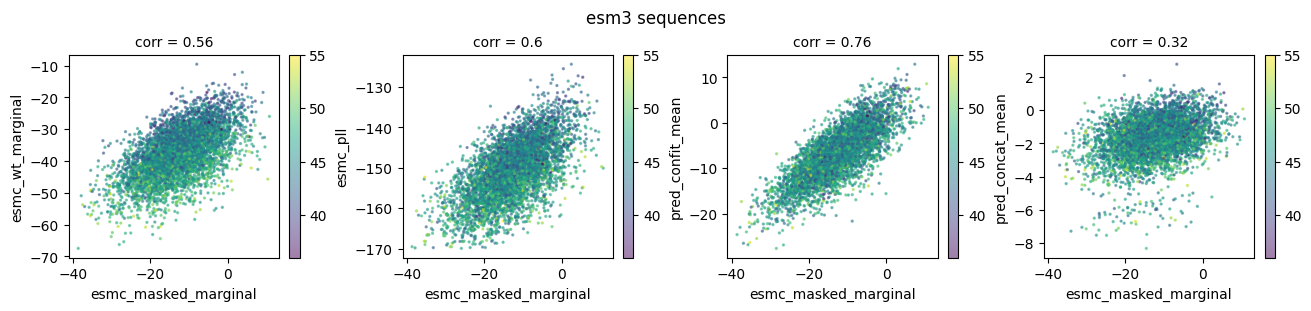

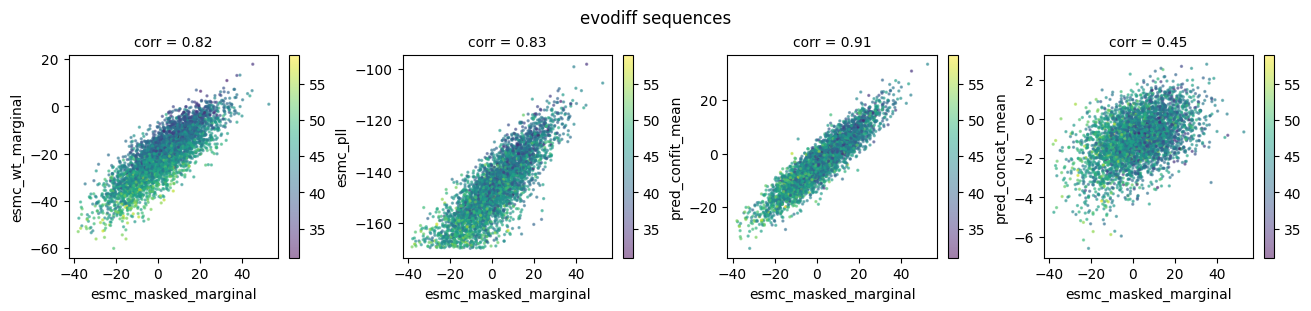

In [19]:
predictors = ['esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']
x_anchor = 'esmc_masked_marginal'

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
mask = df_gen['name'].str.contains('esm3')
print(f'no of esm3 sequences: {mask.sum()}')
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_gen[x_anchor][mask], df_gen[predictors[i]][mask], alpha=0.5, s=2, c=df_gen['n_mut'][mask])
    corr = stats.spearmanr(df_gen[x_anchor][mask], df_gen[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)
fig.suptitle('esm3 sequences')

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
mask = df_gen['name'].str.contains('evodiff')
print(f'no of evodiff sequences: {mask.sum()}')
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_gen[x_anchor][mask], df_gen[predictors[i]][mask], alpha=0.5, s=2, c=df_gen['n_mut'][mask])
    corr = stats.spearmanr(df_gen[x_anchor][mask], df_gen[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)
fig.suptitle('evodiff sequences')

plt.show()

#### Filter by std dev

no of esm3 sequences: 2192
no of evodiff sequences: 436


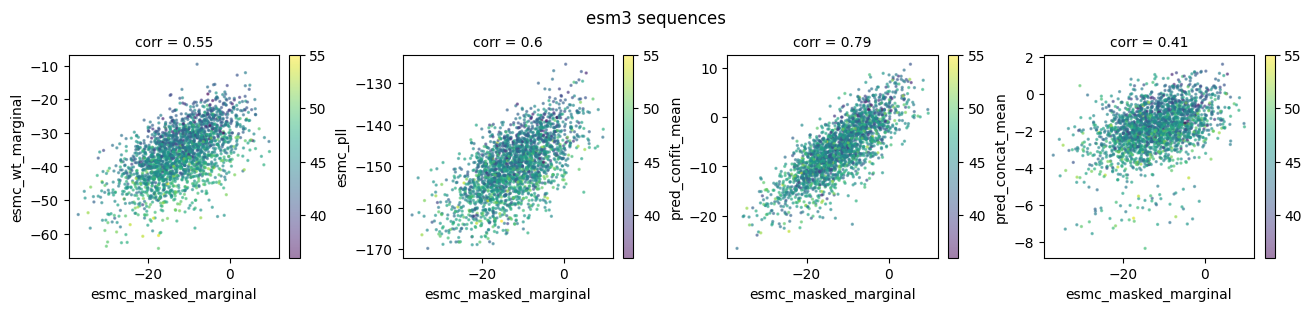

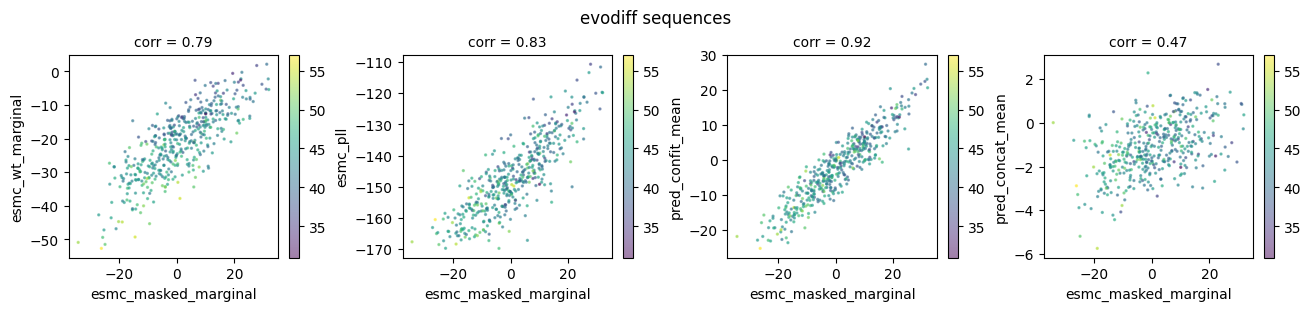

In [20]:
predictors = ['esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']
x_anchor = 'esmc_masked_marginal'

filter_mask = (df_gen['pred_concat_std'] < 1) & (df_gen['pred_confit_std'] < 3)

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
mask = df_gen['name'].str.contains('esm3') & filter_mask
print(f'no of esm3 sequences: {mask.sum()}')
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_gen[x_anchor][mask], df_gen[predictors[i]][mask], alpha=0.5, s=2, c=df_gen['n_mut'][mask])
    corr = stats.spearmanr(df_gen[x_anchor][mask], df_gen[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)
fig.suptitle('esm3 sequences')

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
mask = df_gen['name'].str.contains('evodiff') & filter_mask
print(f'no of evodiff sequences: {mask.sum()}')
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_gen[x_anchor][mask], df_gen[predictors[i]][mask], alpha=0.5, s=2, c=df_gen['n_mut'][mask])
    corr = stats.spearmanr(df_gen[x_anchor][mask], df_gen[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)
fig.suptitle('evodiff sequences')

plt.show()

#### Filter by values

no of esm3 sequences: 736
no of evodiff sequences: 327


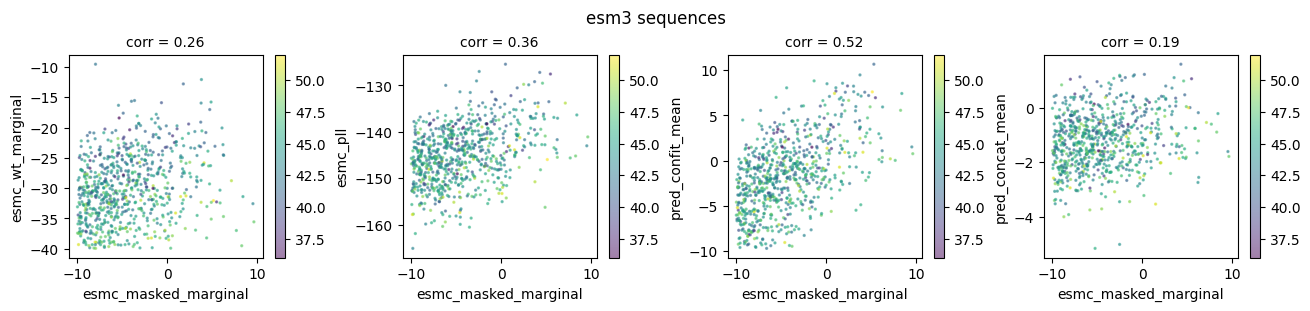

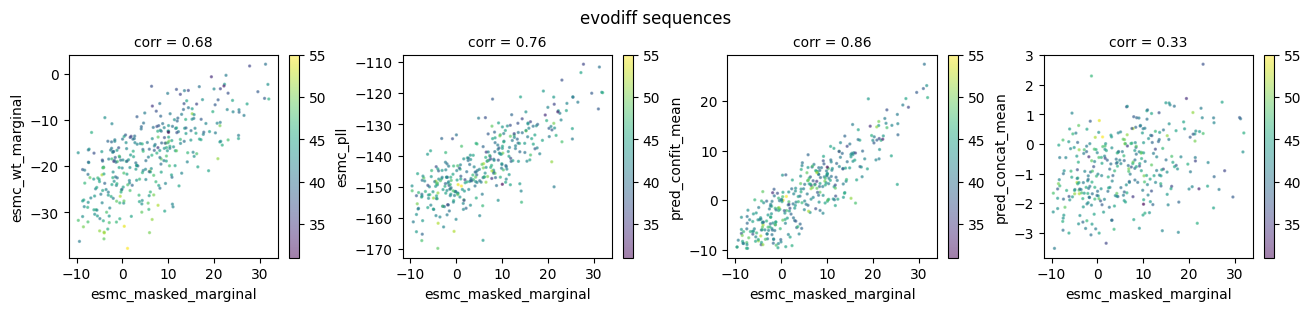

In [21]:
predictors = ['esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']
x_anchor = 'esmc_masked_marginal'

filter_mask = (df_gen['pred_concat_std'] < 1) & (df_gen['pred_confit_std'] < 3) & (df_gen['esmc_wt_marginal'] > -40) & (df_gen['pred_confit_mean'] > -10) & (df_gen['esmc_masked_marginal'] > -10)

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
mask = df_gen['name'].str.contains('esm3') & filter_mask
print(f'no of esm3 sequences: {mask.sum()}')
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_gen[x_anchor][mask], df_gen[predictors[i]][mask], alpha=0.5, s=2, c=df_gen['n_mut'][mask])
    corr = stats.spearmanr(df_gen[x_anchor][mask], df_gen[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)
fig.suptitle('esm3 sequences')

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
mask = df_gen['name'].str.contains('evodiff') & filter_mask
print(f'no of evodiff sequences: {mask.sum()}')
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_gen[x_anchor][mask], df_gen[predictors[i]][mask], alpha=0.5, s=2, c=df_gen['n_mut'][mask])
    corr = stats.spearmanr(df_gen[x_anchor][mask], df_gen[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)
fig.suptitle('evodiff sequences')

plt.show()

#### Filter

In [22]:
filter_mask = (df_gen['pred_concat_std'] < 1) & (df_gen['pred_confit_std'] < 3) & (df_gen['esmc_wt_marginal'] > -40) & (df_gen['pred_confit_mean'] > -10) & (df_gen['esmc_masked_marginal'] > -10)
df_filtered = df_gen[filter_mask].copy().reset_index(drop=True)

In [23]:
df_filtered.shape

(1063, 20)

In [24]:
df_filtered.head()

,name,sequence,masked_sequence,n_mut,esmc_wt_marginal,esmc_masked_marginal,esmc_pll,esmc_full_wt_marginal,esmc_full_masked_marginal,mut_bin,pred_confit_1,pred_confit_2,pred_confit_3,pred_concat_1,pred_concat_2,pred_concat_3,pred_confit_mean,pred_confit_std,pred_concat_mean,pred_concat_std
0,gxps_ATC_esm3_str_gen_25,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APGPDSFPREPYEAPEGEVEQLLAGIWQELLGVERVGRHDSFFALG...,42,-30.841431,-8.410400,-148.76608,-34.417603,-25.048492,40-50,-4.325684,-2.807617,-4.441406,-2.246627,-2.571942,-2.871623,-3.858236,0.911700,-2.563397,0.312586
1,gxps_ATC_esm3_str_gen_27,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APAAEAFPQAPYEAPEGDIEQFLAGVWRELLQVERVGRHDSFFALG...,44,-30.261353,-6.108521,-143.50490,-37.544067,-23.906738,40-50,0.779541,-3.179199,-3.553955,0.060684,-0.443067,-0.993095,-1.984538,2.401085,-0.458493,0.527059
2,gxps_ATC_esm3_str_gen_29,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APAEESYDRTPYVAPRGETEQTLAAIWRELLGVERVGRDDSFFALG...,38,-22.480469,0.791992,-143.17838,-34.229004,-22.145508,30-40,4.297363,2.588623,4.234375,0.218645,0.085790,0.266000,3.706787,0.968870,0.190145,0.093424
3,gxps_ATC_esm3_str_gen_31,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APSEDAYDRPPYVAPEGPVEQMLADIWRELLEVERVGRSDNFFALG...,45,-36.095337,-9.011963,-149.20845,-46.461060,-29.523560,40-50,3.579834,-1.235352,1.404297,-0.719070,-0.964372,-0.825364,1.249593,2.411318,-0.836268,0.123014
4,gxps_ATC_esm3_str_gen_37,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APAADAYPQRPFQAPQGETEQLLAGIWQELLGVERVGRHDSFFELG...,43,-36.822754,-7.391602,-144.13368,-41.442749,-18.087402,40-50,-0.307861,-3.884277,-2.801270,-2.850617,-2.257100,-2.874968,-2.331136,1.833973,-2.660895,0.349909


### Selection

In [25]:
from collections import defaultdict
from functools import reduce
from collections import Counter

In [78]:
select_by_quantile = False

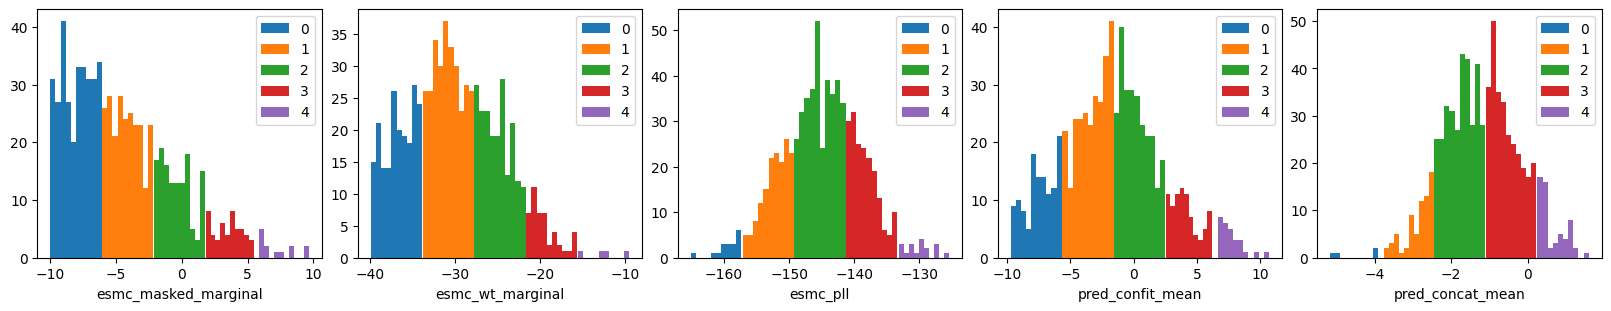

In [79]:
predictors = ['esmc_masked_marginal', 'esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']

fig, ax = plt.subplots(1, 5, figsize=(16, 3), layout='constrained')
mask = df_filtered['name'].str.contains('esm3')
for i, ax_ in enumerate(ax.flatten()):
    _df = df_filtered.loc[mask, ['name', predictors[i]]].copy()
    _df = _df.sort_values(by=predictors[i], ascending=False).reset_index(drop=True)
    if select_by_quantile:
        _df['bin'] = pd.qcut(_df[predictors[i]], q=5, labels=False)
    else:
        _df['bin'] = pd.cut(_df[predictors[i]], bins=5, labels=False)
    for _bin in np.sort(_df['bin'].unique()):
        ax_.hist(_df[_df['bin']==_bin][predictors[i]], label=_bin)
    ax_.legend()
    ax_.set_xlabel(predictors[i])

In [80]:
predictors = ['esmc_masked_marginal', 'esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']
mask = df_filtered['name'].str.contains('esm3')
sequnces_in_bins = defaultdict(list)
for i, ax_ in enumerate(ax.flatten()):
    _df = df_filtered.loc[mask, ['name', predictors[i]]].copy()
    _df = _df.sort_values(by=predictors[i], ascending=False).reset_index(drop=True)
    if select_by_quantile:
        _df['bin'] = pd.qcut(_df[predictors[i]], q=5, labels=False)
    else:
        _df['bin'] = pd.cut(_df[predictors[i]], bins=5, labels=False)
    for _bin in np.sort(_df['bin'].unique()):
        sequnces_in_bins[_bin].append(_df[_df['bin']==_bin]['name'].to_list())

bin 0
n of dps with intersection 4: 6
n of dps with intersection 3: 41
n of dps with intersection 2: 129
n of dps with intersection 1: 245
bin 1
n of dps with intersection 4: 15
n of dps with intersection 3: 81
n of dps with intersection 2: 232
n of dps with intersection 1: 249
bin 2
n of dps with intersection 5: 2
n of dps with intersection 4: 31
n of dps with intersection 3: 129
n of dps with intersection 2: 234
n of dps with intersection 1: 260
bin 3
n of dps with intersection 4: 6
n of dps with intersection 3: 31
n of dps with intersection 2: 145
n of dps with intersection 1: 238
bin 4
n of dps with intersection 3: 2
n of dps with intersection 2: 14
n of dps with intersection 1: 86


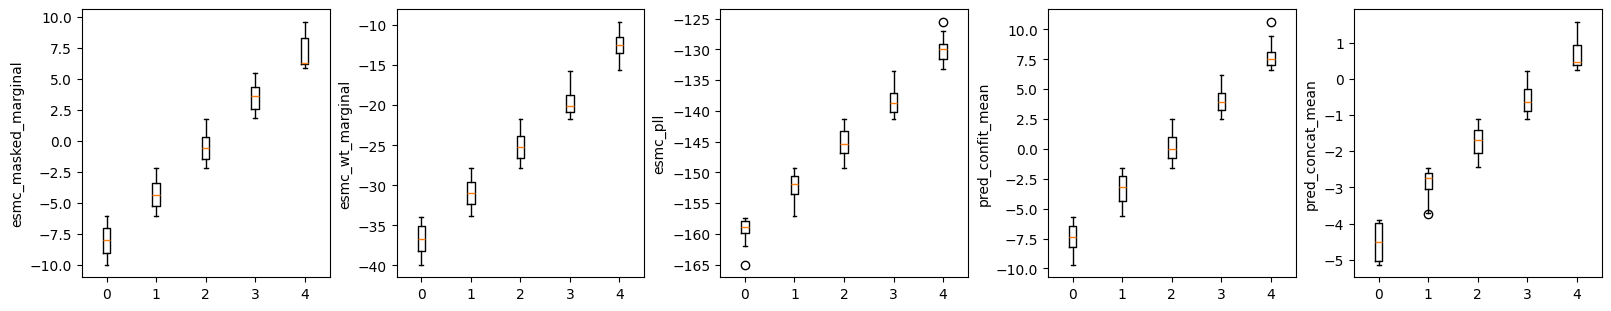

In [81]:
mask = df_gen['name'].str.contains('esm3')
fig, ax = plt.subplots(1, 5, figsize=(16, 3), layout='constrained')
intersect_bins = {}
for _bin in sequnces_in_bins:
    assert len(sequnces_in_bins[_bin]) == 5
    print(f'bin {_bin}')
    for i, _pred in enumerate(predictors):
        ax[i].boxplot(df_filtered.loc[df_filtered['name'].isin(sequnces_in_bins[_bin][i]), _pred], positions=[_bin])
        ax[i].set_ylabel(_pred)
    
    counts = Counter()
    for _x in sequnces_in_bins[_bin]:
        unique_items = set(_x)
        counts.update(unique_items)

    intersection_counts = defaultdict(list)
    for _name in counts:
        intersection_counts[counts[_name]].append(_name)
    intersect_bins[_bin] = intersection_counts

    for _x in sorted(intersection_counts, reverse=True):
        print(f'n of dps with intersection {_x}: {len(intersection_counts[_x])}')

In [82]:
if select_by_quantile:
    esm3_selection_counts = [5, 4, 3, 2, 1]
else:
    esm3_selection_counts = [2, 4, 4, 3, 2]
selection_bins = [4, 3, 2, 1, 0]

assert sum(esm3_selection_counts) == 15

selected = {}
for _bin, min_count in zip(selection_bins, esm3_selection_counts):
    print(f'selecting for bin {_bin}')
    current_selection = []
    needed_count = min_count
    for n in sorted(intersect_bins[_bin].keys(), reverse=True):
        if len(intersect_bins[_bin][n]) >= needed_count:
            print(f'{n} intersect has enough points({len(intersect_bins[_bin][n])}): needed {needed_count}')
            _df = df_filtered.loc[df_filtered['name'].isin(intersect_bins[_bin][n])].sort_values(by='pred_confit_std').copy()
            current_selection += _df['name'].to_list()[:needed_count]
            break
        else:
            print(f'{n} intersect has {len(intersect_bins[_bin][n])}: need {min_count - len(intersect_bins[_bin][n])} points')
            needed_count -= len(intersect_bins[_bin][n])
            current_selection += df_filtered.loc[df_filtered['name'].isin(intersect_bins[_bin][n]), 'name'].to_list()

    print(current_selection)
    assert len(current_selection) == min_count

    selected[_bin] = current_selection
            

selecting for bin 4
3 intersect has enough points(2): needed 2
['gxps_ATC_esm3_str_gen_1805', 'gxps_ATC_esm3_str_gen_3786']
selecting for bin 3
4 intersect has enough points(6): needed 4
['gxps_ATC_esm3_str_gen_4598', 'gxps_ATC_esm3_str_gen_638', 'gxps_ATC_esm3_str_gen_763', 'gxps_ATC_esm3_str_gen_1562']
selecting for bin 2
5 intersect has 2: need 2 points
4 intersect has enough points(31): needed 2
['gxps_ATC_esm3_str_gen_784', 'gxps_ATC_esm3_str_gen_2279', 'gxps_ATC_esm3_str_gen_4308', 'gxps_ATC_esm3_str_gen_1257']
selecting for bin 1
4 intersect has enough points(15): needed 3
['gxps_ATC_esm3_str_gen_962', 'gxps_ATC_esm3_str_gen_3058', 'gxps_ATC_esm3_str_gen_2278']
selecting for bin 0
4 intersect has enough points(6): needed 2
['gxps_ATC_esm3_str_gen_4314', 'gxps_ATC_esm3_str_gen_4735']


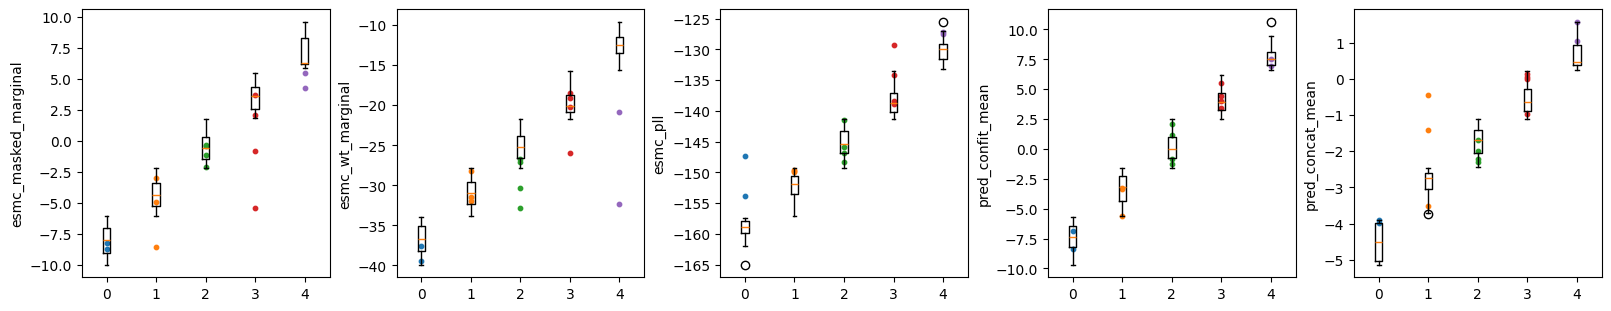

In [83]:
mask = df_gen['name'].str.contains('esm3')
fig, ax = plt.subplots(1, 5, figsize=(16, 3), layout='constrained')
for _bin in sequnces_in_bins:
    assert len(sequnces_in_bins[_bin]) == 5
    for i, _pred in enumerate(predictors):
        ax[i].boxplot(df_filtered.loc[df_filtered['name'].isin(sequnces_in_bins[_bin][i]), _pred], positions=[_bin])
        ax[i].scatter([_bin]*len(selected[_bin]), df_filtered.loc[df_filtered['name'].isin(selected[_bin]), _pred], s=10)
        ax[i].set_ylabel(_pred)

In [84]:
df_filtered.loc[df_filtered['name'].isin([item for key in selected for item in selected[key]])]

,name,sequence,masked_sequence,n_mut,esmc_wt_marginal,esmc_masked_marginal,esmc_pll,esmc_full_wt_marginal,esmc_full_masked_marginal,mut_bin,pred_confit_1,pred_confit_2,pred_confit_3,pred_concat_1,pred_concat_2,pred_concat_3,pred_confit_mean,pred_confit_std,pred_concat_mean,pred_concat_std
103,gxps_ATC_esm3_str_gen_638,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APDAAAYPRPAYEAPEGEVEQTLAAIWTELLGVERVGRHDNFFALG...,41,-20.210938,-0.761230,-134.173200,-26.866699,-10.691895,40-50,6.273926,2.420898,3.275391,0.189333,-0.089853,-0.083308,3.990072,2.023495,0.005391,0.159332
121,gxps_ATC_esm3_str_gen_763,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APGESDFDRTPYVAPQGETEQLLAGIWQELLGVERVGRNDSFFALG...,36,-18.414062,-5.355469,-138.874830,-25.537109,-20.230469,30-40,5.123047,1.125000,4.144531,-0.016939,0.404201,-0.001338,3.464193,2.084044,0.128641,0.238769
124,gxps_ATC_esm3_str_gen_784,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APEASSYDRVPYEAPEGETEQLLAAIWQELLGVERVGRRDSFFALG...,46,-27.091797,-0.394531,-146.856500,-34.895996,-17.746094,40-50,-0.617188,-2.720215,0.833008,-1.575275,-1.745260,-1.750286,-0.834798,1.786579,-1.690274,0.099623
154,gxps_ATC_esm3_str_gen_962,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APEDDAYDRVPYVAPEGETEQTLAEIWQELLGVERVGRHDSFFALG...,42,-28.216431,-8.526367,-149.584140,-28.108032,-21.222778,40-50,-5.200928,-6.148193,-5.517578,-3.507267,-3.233564,-3.811282,-5.622233,0.482227,-3.517371,0.288991
199,gxps_ATC_esm3_str_gen_1257,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APDAESYPREPYEAPQGEIEQTLAGIWQELLGVDRVGRHDSFFELG...,45,-30.376953,-1.111328,-141.542570,-37.137207,-13.048340,40-50,-0.575195,-1.397949,-1.739258,-2.547595,-1.594598,-2.735352,-1.237467,0.598395,-2.292515,0.611661
239,gxps_ATC_esm3_str_gen_1562,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APGAADFDRTPYVAPEGETEQTLAAIWQELLQVERVGRDDNFFALG...,47,-25.903809,2.083984,-138.394940,-37.224731,-25.431763,40-50,8.074219,3.089844,5.358398,-0.440740,-1.279218,-1.163090,5.507487,2.495530,-0.961016,0.454298
273,gxps_ATC_esm3_str_gen_1805,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APGEEAYARAPYEAPVGEREQLLASIWTELLKVERVGRHDSFFALG...,38,-32.277344,5.478516,-127.559235,-42.594238,-19.410156,30-40,9.787598,5.353516,5.727051,1.349153,1.085654,0.729370,6.956055,2.459290,1.054726,0.311047
356,gxps_ATC_esm3_str_gen_2278,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APAEESYDRPRYEAPEGDTEQTLAEIWRQLLQVDRVGRHDNFFALG...,50,-31.999512,-2.951172,-150.002270,-44.906372,-26.396118,40-50,-1.985840,-4.115723,-4.070312,-1.316283,-1.460103,-1.429050,-3.390625,1.216791,-1.401812,0.075680
357,gxps_ATC_esm3_str_gen_2279,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APGDEDFDRPAYVPPEGETEQLLAAIWQELLGVERVGRHDSFFALG...,41,-26.734375,-2.122070,-145.931430,-33.803223,-19.988281,40-50,3.891113,-1.285156,1.015137,-2.114533,-2.381155,-2.116584,1.207031,2.593465,-2.204091,0.153345
471,gxps_ATC_esm3_str_gen_3058,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APDDAAYDQPPYVAPEGETEQMLAAIWQDLLGVERVGRHDSFFALG...,44,-31.490234,-4.910156,-149.795100,-33.685059,-21.190430,40-50,-2.332031,-4.479248,-2.910156,0.388258,-1.178279,-0.527503,-3.240479,1.111067,-0.439175,0.786995


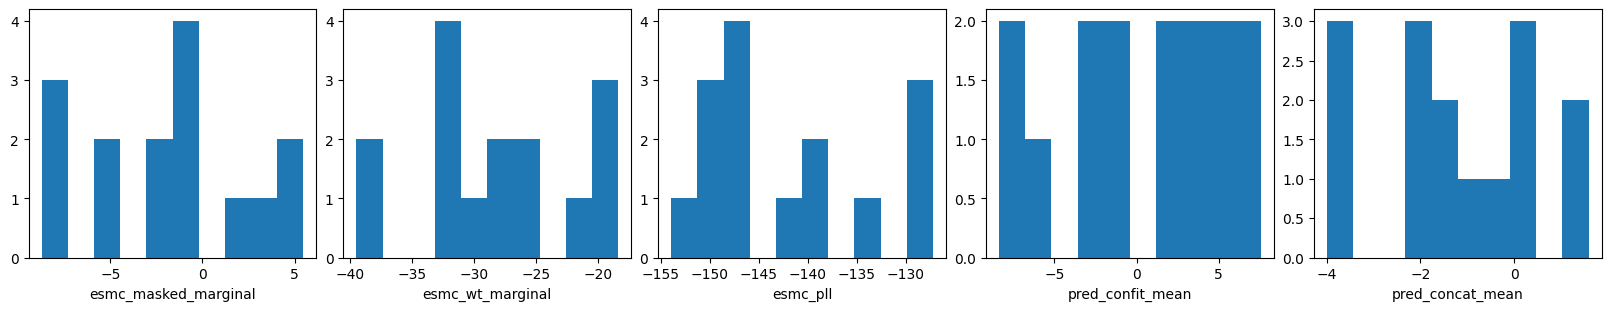

In [85]:
predictors = ['esmc_masked_marginal', 'esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']

fig, ax = plt.subplots(1, 5, figsize=(16, 3), layout='constrained')
mask = df_filtered['name'].isin([item for key in selected for item in selected[key]])
for i, ax_ in enumerate(ax.flatten()):
    ax_.hist(df_filtered[mask][predictors[i]], label=_bin)
    ax_.set_xlabel(predictors[i])

In [86]:
esm3_selected = [item for key in selected for item in selected[key]]

no of esm3 sequences: 736


Text(0.5, 0.98, 'esm3 sequences')

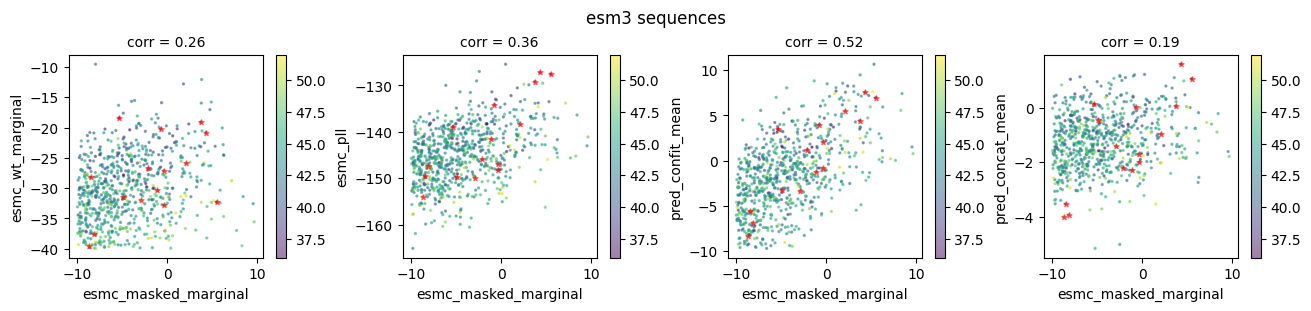

In [87]:
predictors = ['esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']
x_anchor = 'esmc_masked_marginal'

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
mask = df_filtered['name'].str.contains('esm3')
sel_mask = df_filtered['name'].isin(esm3_selected)
print(f'no of esm3 sequences: {mask.sum()}')
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_filtered[x_anchor][mask], df_filtered[predictors[i]][mask], alpha=0.5, s=2, c=df_filtered['n_mut'][mask])
    ax_.scatter(df_filtered[x_anchor][sel_mask], df_filtered[predictors[i]][sel_mask], alpha=0.5, s=15, marker='*', color='red')
    corr = stats.spearmanr(df_filtered[x_anchor][mask], df_filtered[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)
fig.suptitle('esm3 sequences')

### EvoDiff selection

In [99]:
select_by_quantile = True

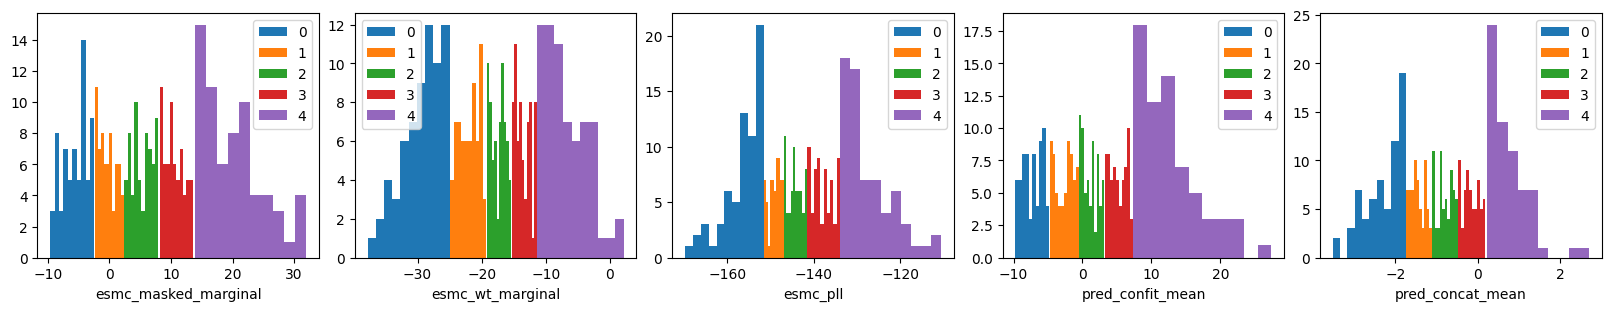

In [100]:
predictors = ['esmc_masked_marginal', 'esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']

fig, ax = plt.subplots(1, 5, figsize=(16, 3), layout='constrained')
mask = df_filtered['name'].str.contains('evodiff')
for i, ax_ in enumerate(ax.flatten()):
    _df = df_filtered.loc[mask, ['name', predictors[i]]].copy()
    _df = _df.sort_values(by=predictors[i], ascending=False).reset_index(drop=True)
    if select_by_quantile:
        _df['bin'] = pd.qcut(_df[predictors[i]], q=5, labels=False)
    else:
        _df['bin'] = pd.cut(_df[predictors[i]], bins=5, labels=False)
    for _bin in np.sort(_df['bin'].unique()):
        ax_.hist(_df[_df['bin']==_bin][predictors[i]], label=_bin)
    ax_.legend()
    ax_.set_xlabel(predictors[i])

In [101]:
predictors = ['esmc_masked_marginal', 'esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']
mask = df_filtered['name'].str.contains('evodiff')
sequnces_in_bins = defaultdict(list)
for i, ax_ in enumerate(ax.flatten()):
    _df = df_filtered.loc[mask, ['name', predictors[i]]].copy()
    _df = _df.sort_values(by=predictors[i], ascending=False).reset_index(drop=True)
    if select_by_quantile:
        _df['bin'] = pd.qcut(_df[predictors[i]], q=5, labels=False)
    else:
        _df['bin'] = pd.cut(_df[predictors[i]], bins=5, labels=False)
    for _bin in np.sort(_df['bin'].unique()):
        sequnces_in_bins[_bin].append(_df[_df['bin']==_bin]['name'].to_list())

bin 0
n of dps with intersection 5: 5
n of dps with intersection 4: 17
n of dps with intersection 3: 30
n of dps with intersection 2: 40
n of dps with intersection 1: 67
bin 1
n of dps with intersection 5: 1
n of dps with intersection 4: 3
n of dps with intersection 3: 27
n of dps with intersection 2: 68
n of dps with intersection 1: 91
bin 2
n of dps with intersection 4: 4
n of dps with intersection 3: 27
n of dps with intersection 2: 62
n of dps with intersection 1: 104
bin 3
n of dps with intersection 5: 2
n of dps with intersection 4: 9
n of dps with intersection 3: 24
n of dps with intersection 2: 59
n of dps with intersection 1: 89
bin 4
n of dps with intersection 5: 15
n of dps with intersection 4: 24
n of dps with intersection 3: 18
n of dps with intersection 2: 22
n of dps with intersection 1: 61


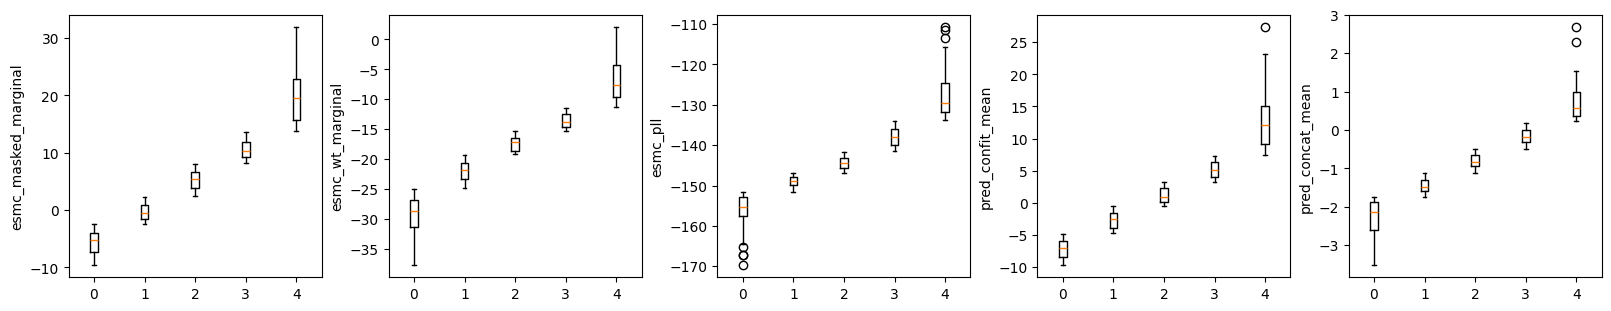

In [102]:
mask = df_gen['name'].str.contains('evodiff')
fig, ax = plt.subplots(1, 5, figsize=(16, 3), layout='constrained')
intersect_bins = {}
for _bin in sequnces_in_bins:
    assert len(sequnces_in_bins[_bin]) == 5
    print(f'bin {_bin}')
    for i, _pred in enumerate(predictors):
        ax[i].boxplot(df_filtered.loc[df_filtered['name'].isin(sequnces_in_bins[_bin][i]), _pred], positions=[_bin])
        ax[i].set_ylabel(_pred)
    
    counts = Counter()
    for _x in sequnces_in_bins[_bin]:
        unique_items = set(_x)
        counts.update(unique_items)

    intersection_counts = defaultdict(list)
    for _name in counts:
        intersection_counts[counts[_name]].append(_name)
    intersect_bins[_bin] = intersection_counts

    for _x in sorted(intersection_counts, reverse=True):
        print(f'n of dps with intersection {_x}: {len(intersection_counts[_x])}')

In [104]:
if select_by_quantile:
    esm3_selection_counts = [3, 3, 3, 3, 3]
else:
    esm3_selection_counts = [3, 3, 3, 3, 3]
selection_bins = [4, 3, 2, 1, 0]

assert sum(esm3_selection_counts) == 15

selected = {}
for _bin, min_count in zip(selection_bins, esm3_selection_counts):
    print(f'selecting for bin {_bin}')
    current_selection = []
    needed_count = min_count
    for n in sorted(intersect_bins[_bin].keys(), reverse=True):
        if len(intersect_bins[_bin][n]) >= needed_count:
            print(f'{n} intersect has enough points({len(intersect_bins[_bin][n])}): needed {needed_count}')
            _df = df_filtered.loc[df_filtered['name'].isin(intersect_bins[_bin][n])].sort_values(by='pred_confit_std').copy()
            current_selection += _df['name'].to_list()[:needed_count]
            break
        else:
            print(f'{n} intersect has {len(intersect_bins[_bin][n])}: need {min_count - len(intersect_bins[_bin][n])} points')
            needed_count -= len(intersect_bins[_bin][n])
            current_selection += df_filtered.loc[df_filtered['name'].isin(intersect_bins[_bin][n]), 'name'].to_list()

    print(current_selection)
    assert len(current_selection) == min_count

    selected[_bin] = current_selection
            

selecting for bin 4
5 intersect has enough points(15): needed 3
['gxps_ATC_evodiff_gen_2521', 'gxps_ATC_evodiff_gen_87', 'gxps_ATC_evodiff_gen_574']
selecting for bin 3
5 intersect has 2: need 1 points
4 intersect has enough points(9): needed 1
['gxps_ATC_evodiff_gen_176', 'gxps_ATC_evodiff_gen_4124', 'gxps_ATC_evodiff_gen_2611']
selecting for bin 2
4 intersect has enough points(4): needed 3
['gxps_ATC_evodiff_gen_644', 'gxps_ATC_evodiff_gen_4423', 'gxps_ATC_evodiff_gen_2064']
selecting for bin 1
5 intersect has 1: need 2 points
4 intersect has enough points(3): needed 2
['gxps_ATC_evodiff_gen_3402', 'gxps_ATC_evodiff_gen_1501', 'gxps_ATC_evodiff_gen_943']
selecting for bin 0
5 intersect has enough points(5): needed 3
['gxps_ATC_evodiff_gen_4478', 'gxps_ATC_evodiff_gen_4761', 'gxps_ATC_evodiff_gen_4395']


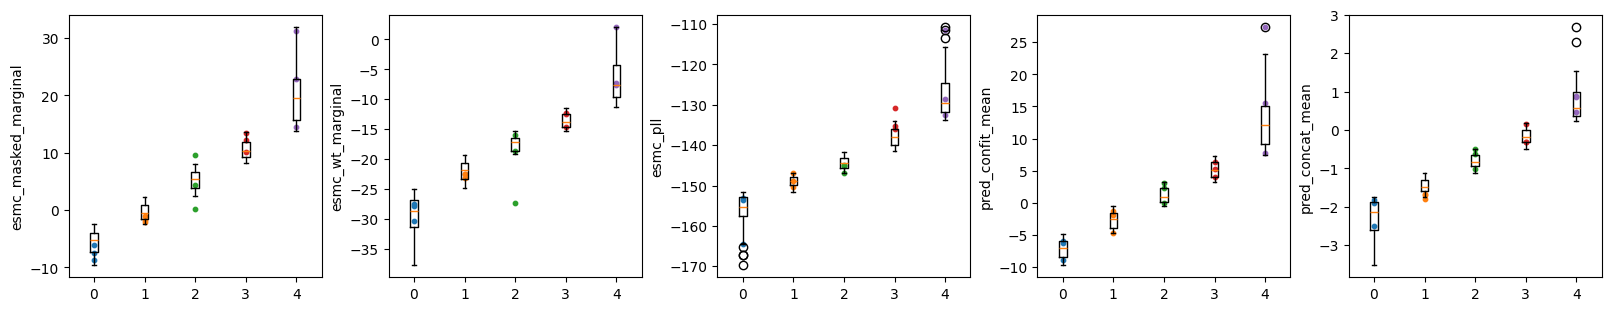

In [105]:
mask = df_gen['name'].str.contains('evodiff')
fig, ax = plt.subplots(1, 5, figsize=(16, 3), layout='constrained')
for _bin in sequnces_in_bins:
    assert len(sequnces_in_bins[_bin]) == 5
    for i, _pred in enumerate(predictors):
        ax[i].boxplot(df_filtered.loc[df_filtered['name'].isin(sequnces_in_bins[_bin][i]), _pred], positions=[_bin])
        ax[i].scatter([_bin]*len(selected[_bin]), df_filtered.loc[df_filtered['name'].isin(selected[_bin]), _pred], s=10)
        ax[i].set_ylabel(_pred)

In [106]:
df_filtered.loc[df_filtered['name'].isin([item for key in selected for item in selected[key]])]

,name,sequence,masked_sequence,n_mut,esmc_wt_marginal,esmc_masked_marginal,esmc_pll,esmc_full_wt_marginal,esmc_full_masked_marginal,mut_bin,pred_confit_1,pred_confit_2,pred_confit_3,pred_concat_1,pred_concat_2,pred_concat_3,pred_confit_mean,pred_confit_std,pred_concat_mean,pred_concat_std
739,gxps_ATC_evodiff_gen_87,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APAEDAFVRQAHVAPQGELETALAQIWAGLLGIEQVGRHDSFFALG...,42,-7.694336,22.901367,-128.552370,-7.124268,8.355225,40-50,16.032227,16.995605,13.487305,1.509371,0.623609,0.522773,15.505046,1.812590,0.885251,0.542850
743,gxps_ATC_evodiff_gen_176,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APMDGAFIRQVYEAPQGATETALAAIWAEVLRLEQIGRYDNFFALG...,41,-12.483398,12.245605,-135.134020,-12.350586,4.009033,40-50,6.064453,4.628906,1.236328,-0.268349,-0.185764,-0.497084,3.976562,2.479287,-0.317065,0.161276
768,gxps_ATC_evodiff_gen_574,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APDDQAFVRQAYEAPQGESEIALAAIWRDLLGVERIGRHDNFFALG...,40,2.145508,31.268555,-111.554016,1.809570,28.629395,30-40,29.027344,28.522461,24.718750,0.975735,0.671366,0.905281,27.422852,2.355388,0.850794,0.159332
774,gxps_ATC_evodiff_gen_644,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APEDMAYARQIYAAPQGEIESALAGIWSLLLNVERIGRHDNFFALG...,43,-27.416992,4.334961,-145.264900,-27.909180,-2.999512,40-50,3.402344,2.724609,0.576172,-0.657834,0.169338,-1.369317,2.234375,1.475486,-0.619271,0.770052
793,gxps_ATC_evodiff_gen_943,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,EPGDQAFARQIYAAPQGETETTLASIWCELLGIEQISRHDNFFTLG...,46,-22.467529,-2.091553,-146.912260,-13.203613,1.339844,40-50,1.484375,-3.114746,-2.048828,-1.431392,-1.041410,-2.530514,-1.226400,2.407337,-1.667772,0.772181
837,gxps_ATC_evodiff_gen_1501,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APGDEAVATRLYDAPQGETEIALAAIWRDLLNIERIGRHDQFFALG...,43,-23.262695,-1.801758,-148.795320,-30.528320,-10.135742,40-50,-2.203125,-5.894531,-5.755859,-2.156006,-0.807151,-2.422432,-4.617839,2.092352,-1.795196,0.865980
865,gxps_ATC_evodiff_gen_2064,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APDQESFDRAVYEAPQGEVETALAAIWAELLGVERISRHDNFFALG...,46,-15.939209,9.645264,-146.923980,-17.487305,-0.258789,40-50,5.225586,1.450684,2.503906,-0.386305,-1.298095,0.209699,3.060059,1.947935,-0.491567,0.759388
894,gxps_ATC_evodiff_gen_2521,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,VPGDQAFARQIYEAPQGETEGILAGIWSDLLGVERVGRHDHFFTLG...,40,-7.285156,14.424316,-132.646410,-3.937500,8.998779,30-40,9.117188,7.300781,6.838867,1.127579,-0.341730,0.638164,7.752279,1.204397,0.474671,0.748174
900,gxps_ATC_evodiff_gen_2611,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APADDAFARQVYEAPQGQTETALAQIWSELLGVEQISRHDNFFALG...,44,-12.375732,10.087158,-130.781080,-15.059082,0.683105,40-50,6.855957,5.450928,3.635742,-0.283953,0.431715,-1.043857,5.314209,1.614455,-0.298698,0.737896
950,gxps_ATC_evodiff_gen_3402,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APGADAYARQAYAAPQGEIETTLATIWSELLQVEQVSRYDNFFTLG...,40,-22.518311,-1.114746,-150.313900,-19.845215,-7.128662,30-40,1.102539,-2.285645,-4.729980,-1.271688,-1.032956,-2.733538,-1.971029,2.928960,-1.679394,0.920686


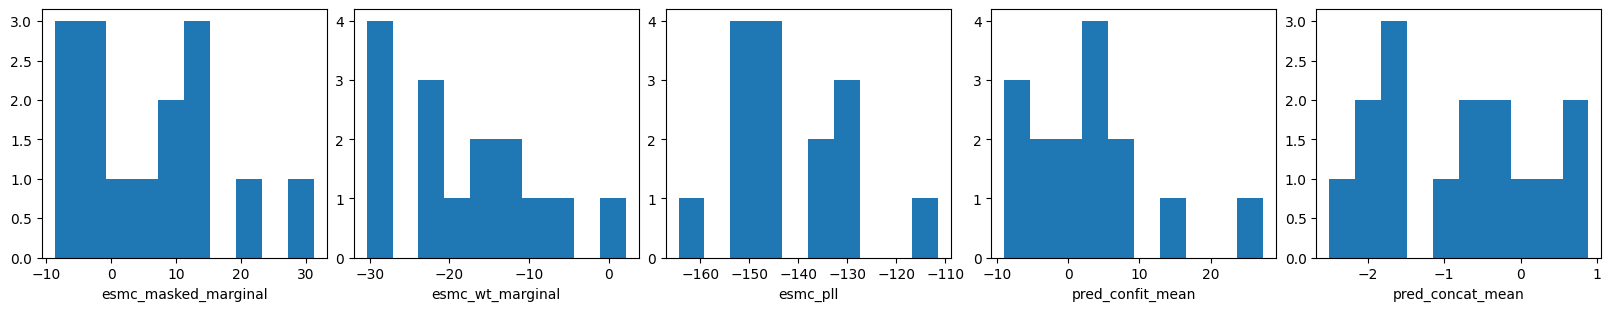

In [107]:
predictors = ['esmc_masked_marginal', 'esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']

fig, ax = plt.subplots(1, 5, figsize=(16, 3), layout='constrained')
mask = df_filtered['name'].isin([item for key in selected for item in selected[key]])
for i, ax_ in enumerate(ax.flatten()):
    ax_.hist(df_filtered[mask][predictors[i]], label=_bin)
    ax_.set_xlabel(predictors[i])

In [108]:
evodiff_selected = [item for key in selected for item in selected[key]]

no of esm3 sequences: 327


Text(0.5, 0.98, 'evodiff sequences')

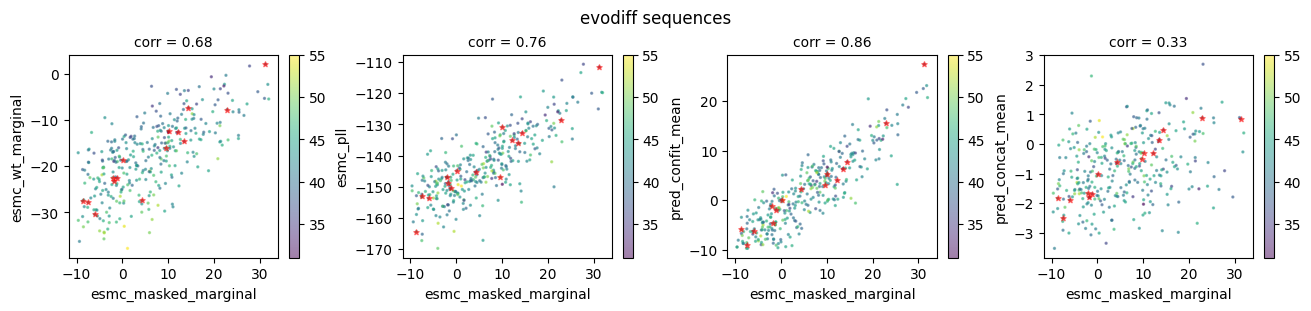

In [110]:
predictors = ['esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']
x_anchor = 'esmc_masked_marginal'

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
mask = df_filtered['name'].str.contains('evodiff')
sel_mask = df_filtered['name'].isin(evodiff_selected)
print(f'no of esm3 sequences: {mask.sum()}')
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_filtered[x_anchor][mask], df_filtered[predictors[i]][mask], alpha=0.5, s=2, c=df_filtered['n_mut'][mask])
    ax_.scatter(df_filtered[x_anchor][sel_mask], df_filtered[predictors[i]][sel_mask], alpha=0.5, s=15, marker='*', color='red')
    corr = stats.spearmanr(df_filtered[x_anchor][mask], df_filtered[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)
fig.suptitle('evodiff sequences')

### Final Selection

In [111]:
df_filtered.shape

(1063, 20)

no of esm3 sequences: 736
no of evodiff sequences: 327


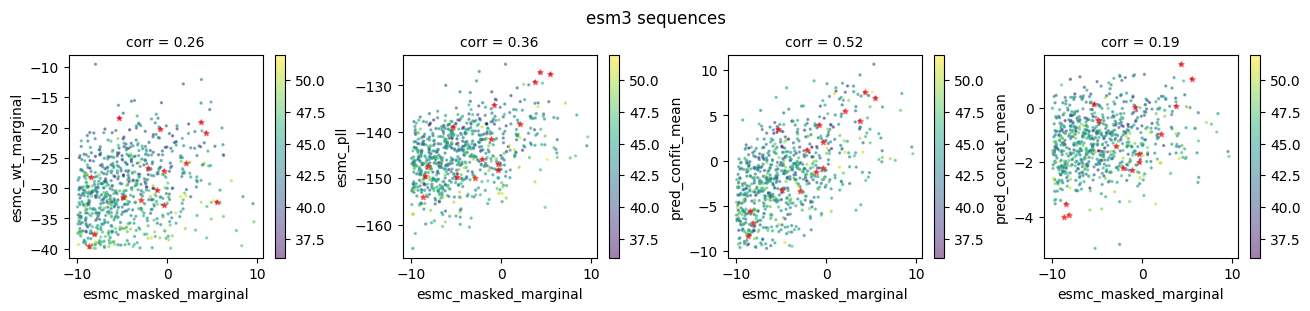

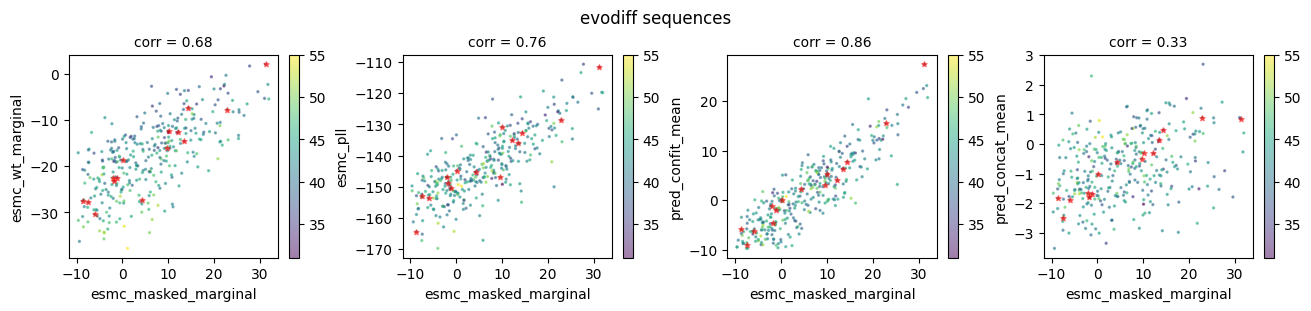

In [114]:
predictors = ['esmc_wt_marginal', 'esmc_pll', 'pred_confit_mean', 'pred_concat_mean']
x_anchor = 'esmc_masked_marginal'

filter_mask = df_filtered['name'].isin(esm3_selected+evodiff_selected)

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
mask = df_filtered['name'].str.contains('esm3')
print(f'no of esm3 sequences: {mask.sum()}')
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_filtered[x_anchor][mask], df_filtered[predictors[i]][mask], alpha=0.5, s=2, c=df_filtered['n_mut'][mask])
    ax_.scatter(df_filtered[x_anchor][mask & filter_mask], df_filtered[predictors[i]][mask & filter_mask], alpha=0.5, s=15, marker='*', color='red')
    corr = stats.spearmanr(df_filtered[x_anchor][mask], df_filtered[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)
fig.suptitle('esm3 sequences')

fig, ax = plt.subplots(1, 4, figsize=(13, 3), layout='constrained')
mask = df_filtered['name'].str.contains('evodiff')
print(f'no of evodiff sequences: {mask.sum()}')
for i, ax_ in enumerate(ax.flatten()):
    im = ax_.scatter(df_filtered[x_anchor][mask], df_filtered[predictors[i]][mask], alpha=0.5, s=2, c=df_filtered['n_mut'][mask])
    ax_.scatter(df_filtered[x_anchor][mask & filter_mask], df_filtered[predictors[i]][mask & filter_mask], alpha=0.5, s=15, marker='*', color='red')
    corr = stats.spearmanr(df_filtered[x_anchor][mask], df_filtered[predictors[i]][mask]).statistic
    ax_.set_title(f'corr = {round(corr, 2)}', size=10)
    ax_.set_xlabel(x_anchor)
    ax_.set_ylabel(predictors[i])
    fig.colorbar(im, ax=ax_)
fig.suptitle('evodiff sequences')

plt.show()

In [115]:
filter_mask = df_filtered['name'].isin(esm3_selected+evodiff_selected)
df_selected = df_filtered[filter_mask]

In [116]:
df_selected

,name,sequence,masked_sequence,n_mut,esmc_wt_marginal,esmc_masked_marginal,esmc_pll,esmc_full_wt_marginal,esmc_full_masked_marginal,mut_bin,pred_confit_1,pred_confit_2,pred_confit_3,pred_concat_1,pred_concat_2,pred_concat_3,pred_confit_mean,pred_confit_std,pred_concat_mean,pred_concat_std
103,gxps_ATC_esm3_str_gen_638,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APDAAAYPRPAYEAPEGEVEQTLAAIWTELLGVERVGRHDNFFALG...,41,-20.210938,-0.761230,-134.173200,-26.866699,-10.691895,40-50,6.273926,2.420898,3.275391,0.189333,-0.089853,-0.083308,3.990072,2.023495,0.005391,0.159332
121,gxps_ATC_esm3_str_gen_763,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APGESDFDRTPYVAPQGETEQLLAGIWQELLGVERVGRNDSFFALG...,36,-18.414062,-5.355469,-138.874830,-25.537109,-20.230469,30-40,5.123047,1.125000,4.144531,-0.016939,0.404201,-0.001338,3.464193,2.084044,0.128641,0.238769
124,gxps_ATC_esm3_str_gen_784,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APEASSYDRVPYEAPEGETEQLLAAIWQELLGVERVGRRDSFFALG...,46,-27.091797,-0.394531,-146.856500,-34.895996,-17.746094,40-50,-0.617188,-2.720215,0.833008,-1.575275,-1.745260,-1.750286,-0.834798,1.786579,-1.690274,0.099623
154,gxps_ATC_esm3_str_gen_962,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APEDDAYDRVPYVAPEGETEQTLAEIWQELLGVERVGRHDSFFALG...,42,-28.216431,-8.526367,-149.584140,-28.108032,-21.222778,40-50,-5.200928,-6.148193,-5.517578,-3.507267,-3.233564,-3.811282,-5.622233,0.482227,-3.517371,0.288991
199,gxps_ATC_esm3_str_gen_1257,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APDAESYPREPYEAPQGEIEQTLAGIWQELLGVDRVGRHDSFFELG...,45,-30.376953,-1.111328,-141.542570,-37.137207,-13.048340,40-50,-0.575195,-1.397949,-1.739258,-2.547595,-1.594598,-2.735352,-1.237467,0.598395,-2.292515,0.611661
239,gxps_ATC_esm3_str_gen_1562,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APGAADFDRTPYVAPEGETEQTLAAIWQELLQVERVGRDDNFFALG...,47,-25.903809,2.083984,-138.394940,-37.224731,-25.431763,40-50,8.074219,3.089844,5.358398,-0.440740,-1.279218,-1.163090,5.507487,2.495530,-0.961016,0.454298
273,gxps_ATC_esm3_str_gen_1805,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APGEEAYARAPYEAPVGEREQLLASIWTELLKVERVGRHDSFFALG...,38,-32.277344,5.478516,-127.559235,-42.594238,-19.410156,30-40,9.787598,5.353516,5.727051,1.349153,1.085654,0.729370,6.956055,2.459290,1.054726,0.311047
356,gxps_ATC_esm3_str_gen_2278,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APAEESYDRPRYEAPEGDTEQTLAEIWRQLLQVDRVGRHDNFFALG...,50,-31.999512,-2.951172,-150.002270,-44.906372,-26.396118,40-50,-1.985840,-4.115723,-4.070312,-1.316283,-1.460103,-1.429050,-3.390625,1.216791,-1.401812,0.075680
357,gxps_ATC_esm3_str_gen_2279,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APGDEDFDRPAYVPPEGETEQLLAAIWQELLGVERVGRHDSFFALG...,41,-26.734375,-2.122070,-145.931430,-33.803223,-19.988281,40-50,3.891113,-1.285156,1.015137,-2.114533,-2.381155,-2.116584,1.207031,2.593465,-2.204091,0.153345
471,gxps_ATC_esm3_str_gen_3058,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APDDAAYDQPPYVAPEGETEQMLAAIWQDLLGVERVGRHDSFFALG...,44,-31.490234,-4.910156,-149.795100,-33.685059,-21.190430,40-50,-2.332031,-4.479248,-2.910156,0.388258,-1.178279,-0.527503,-3.240479,1.111067,-0.439175,0.786995


In [117]:
df_selected.to_csv(os.path.join(data_path, 'r3_select.csv'), index=False)

In [118]:
for name, seq in zip(df_selected['name'], df_selected['sequence']):
    helper.create_fasta({
        name: seq
    },
    file = os.path.join(data_path, 'round3.fasta'),
    append=True
   )

In [119]:
for name, seq in zip(df_selected['name'], df_selected['masked_sequence']):
    assert len(seq) == 115
    helper.create_fasta({
        name: seq
    },
    file = os.path.join(data_path, 'round3_TplusL.fasta'),
    append=True
   )